In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
def plot_mnist(data, classes, incorrect=None):
    for i in range(10):
        idxs = (classes == i) #조건에 맞는 index만 True 나머지는 False로 리턴된다.
        # 클래스 i에 해당하는 10개의 데이터
        
        if incorrect is not None:
            idxs *= incorrect
        
        images = data[idxs][0:10] #True조건을 만족하는 index로 data를 뽑고 그 중 10개를 뽑는다.
            
        for j in range(5):   
            plt.subplot(5, 10, i + j*10 + 1) # 행, 열, plot번호
            plt.imshow(images[j].reshape(28, 28), cmap='gray')
            # 클래스당 타이틀 표시
            if j == 0:
                plt.title(i)
            plt.axis('off')
    plt.show()

# Pandas를 이용한 CSV Data Import

In [6]:
train_data = pd.read_csv("./mnist-in-csv/mnist_train.csv")

In [7]:
train_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_input = train_data.iloc[:,1:].values

In [9]:
train_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
type(train_input)

numpy.ndarray

In [11]:
train_input.shape

(60000, 784)

In [12]:
train_label = train_data['label']

In [13]:
train_target = pd.get_dummies(train_label)

In [14]:
train_target.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0


In [15]:
train_target = train_target.values

In [16]:
train_target.shape

(60000, 10)

In [18]:
test_data = pd.read_csv("./mnist-in-csv/mnist_test.csv")

In [19]:
test_input = test_data.iloc[:,1:].values

In [20]:
test_label = test_data['label']
test_target = pd.get_dummies(test_label)
test_target = test_target.values

In [21]:
test_input.shape

(10000, 784)

In [22]:
test_target.shape

(10000, 10)

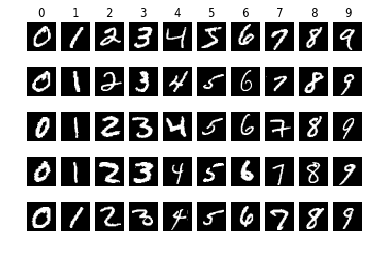

In [23]:
plot_mnist(train_input, train_label)

# FeedForward Neural Network 구성

In [24]:
input_layer = tf.placeholder(tf.float32, [None, 784], "Input_Layer")

In [25]:
# Hidden Layer1의 구성요소 정의
h1_weight = tf.get_variable("Hidden1_Weight", [784,100], tf.float32, tf.initializers.random_normal)
h1_bias = tf.get_variable("Hidden1_Bias", [100], tf.float32, tf.initializers.random_normal)

In [26]:
# Hidden Layer1 계산
with tf.name_scope("Hidden_Layer_1"):
    h1 = tf.matmul(input_layer, h1_weight)
    h1 = tf.nn.bias_add(h1, h1_bias)
    h1 = tf.nn.sigmoid(h1)

In [27]:
# Hidden Layer2의 구성요소 정의
h2_weight = tf.get_variable("Hidden2_Weight", [100,100], tf.float32, tf.initializers.random_normal)
h2_bias = tf.get_variable("Hidden2_Bias", [100], tf.float32, tf.initializers.random_normal)

In [28]:
# Hidden Layer2 계산
with tf.name_scope("Hidden_Layer_2"):
    h2 = tf.matmul(h1, h2_weight)
    h2 = tf.nn.bias_add(h2, h2_bias)
    h2 = tf.nn.sigmoid(h2)

In [29]:
# Output Layer의 구성요소 정의
output_weight = tf.get_variable("Output_weight", [100, 10], tf.float32, tf.initializers.random_normal)
output_bias = tf.get_variable("Output_Bias", [10], tf.float32, tf.initializers.random_normal)

In [30]:
# Hidden Layer2 계산
with tf.name_scope("Output_Layer"):
    output = tf.matmul(h2, output_weight)
    output = tf.nn.bias_add(output, output_bias)

In [31]:
# Cost(Error) 계산의 구성요소 정의
target = tf.placeholder(tf.float32, [None, 10], "Target")

In [32]:
# Cost(Error) 계산
with tf.name_scope("Cost"):
    cross_entrophy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=target, logits=output, name="Cross_Entrophy")
    cost = tf.reduce_mean(cross_entrophy)

In [33]:
# Training(Optimizer) 선언
LEARNING_RATE = 0.5
opt = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)

In [34]:
# Metric(평가 척도) 정의
accuracy = tf.metrics.accuracy(tf.argmax(target,1), tf.argmax(output, 1))

In [35]:
# session 생성 및 초기화
sess = tf.Session()
global_init = tf.initializers.global_variables()
local_init = tf.initializers.local_variables()

sess.run(global_init)
sess.run(local_init)

In [36]:
# Tensorboard 정의
writer = tf.summary.FileWriter('./ffnn', sess.graph)
cost_summary = tf.summary.scalar('Cost', cost)
accuracy_summary = tf.summary.scalar('Accuracy', accuracy[1])
merge_summary = tf.summary.merge_all()

In [37]:
# Training HyperParameter 정의
BATCH_NUM = 6
BATCH_SIZE = int(train_data.shape[0]/BATCH_NUM)
EPOCH = 100

In [38]:
# Training 수행
for i in range(EPOCH):
    sess.run(local_init)
    print("Epoch ", i)
    
    for j in range(BATCH_NUM):
        batch_i = train_input[BATCH_SIZE*j:BATCH_SIZE*(j+1)]
        batch_t = train_target[BATCH_SIZE*j:BATCH_SIZE*(j+1)]
        sess.run(opt, feed_dict={input_layer: batch_i, target: batch_t})
        cost_ , acc_ = sess.run([cost, accuracy], feed_dict={input_layer: batch_i, target: batch_t})
        print(cost_, acc_[1])
    
    sess.run(local_init)
    summary = sess.run(merge_summary, feed_dict={input_layer: train_input, target: train_target})
    writer.add_summary(summary, i)

5.913053 0.1064
5.0258093 0.1171
4.695543 0.12286667
4.521619 0.129275
4.2592425 0.13576
3.9503071 0.14403333
3.824953 0.198
3.672797 0.203
3.558914 0.20856667
3.5261645 0.2117
3.3182087 0.21826
3.0605698 0.22575
3.024496 0.2692
2.9273841 0.27745
2.851384 0.28376666
2.8565333 0.286325
2.732661 0.29266
2.5024476 0.3012
2.5289745 0.3367
2.4930582 0.34265
2.4217417 0.3498
2.4560332 0.352625
2.36307 0.35702
2.1685946 0.36421666
2.2012844 0.394
2.1793294 0.39675
2.1351259 0.4039
2.158101 0.405725
2.0883105 0.41006
1.9149197 0.41791666
1.9661045 0.4445
1.9580301 0.44475
1.9125894 0.4503
1.9474372 0.4495
1.8967688 0.45278
1.7430503 0.45911667
1.7904863 0.4827
1.7746125 0.4816
1.753891 0.48603332
1.789184 0.485075
1.7498363 0.48762
1.6060965 0.49308333
1.6488652 0.5157
1.6487178 0.51025
1.636755 0.5136333
1.6626011 0.513125
1.6361054 0.51504
1.4917115 0.52068335
1.5517168 0.5396
1.5582204 0.5362
1.5378307 0.53723335
1.5766573 0.5363
1.5449796 0.538
1.4132023 0.54435
1.4693063 0.5623
1.4730788 

0.6143467 0.80862
0.56165427 0.8111167
0.58479995 0.8154
0.6056848 0.8141
0.61391616 0.81186664
0.61621547 0.8106
0.61174256 0.80982
0.5559038 0.81268334
0.5821591 0.8165
0.60177994 0.815
0.60579866 0.8134
0.6155718 0.81215
0.6086311 0.81074
0.55224526 0.8132333
0.5814332 0.8172
0.60463876 0.8147
0.6048643 0.8135667
0.61244446 0.81265
0.60851914 0.81124
0.55127805 0.81395
0.57904416 0.8185
0.59825665 0.8168
0.59941727 0.8165333
0.60819006 0.81525
0.60497296 0.8137
0.5459255 0.8164167
0.57516146 0.8203
0.593604 0.8177
0.595514 0.8175
0.60355276 0.81595
0.599685 0.81472
0.5451686 0.81755
0.5720054 0.8224
0.59197253 0.81925
0.59627277 0.8174667
0.6038652 0.81615
0.59731394 0.81516
0.5404007 0.8177
0.5682293 0.8221
0.58630735 0.8193
0.5933663 0.8185667
0.60153705 0.816675
0.59472716 0.81576
0.54179627 0.8179833
0.56377834 0.8236
0.5857198 0.8204
0.5940028 0.8185
0.5977107 0.8167
0.5911374 0.81562
0.53696746 0.8182167
0.5622159 0.8253
0.58139753 0.8217
0.5883799 0.8197
0.59640265 0.818125
0

In [ ]:
# Test 수행
sess.run(local_init)
final_acc = sess.run(accuracy, feed_dict={input_layer: test_input, target: test_target})
final_target = sess.run(output, feed_dict={input_layer: test_input})
print(final_acc[1])

In [ ]:
# 결과 시각화
plot_mnist(test_input, np.argmax(final_target,1))

In [ ]:
sess.close()